# IMDB Sentiment Analysis - Model Training

This notebook trains Naive Bayes and Logistic Regression classifiers.

In [1]:
import sys
sys.path.append('..')

import numpy as np
import pickle
import time
from src.models import (
    train_naive_bayes, train_logistic_regression,
    save_model, predict_with_confidence
)
from src.utils import ensure_dir

import warnings
warnings.filterwarnings('ignore')

## 1. Load Preprocessed Data

In [2]:
# Load train/test splits
data = np.load('../models/train_test_data.npz', allow_pickle=True)
X_train = data['X_train'].item()
X_test = data['X_test'].item()
y_train = data['y_train']
y_test = data['y_test']

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTraining labels: {y_train.shape}")
print(f"Test labels: {y_test.shape}")
print(f"\nPositive ratio (train): {y_train.mean():.2%}")
print(f"Positive ratio (test): {y_test.mean():.2%}")

Training set: (40000, 5000)
Test set: (10000, 5000)

Training labels: (40000,)
Test labels: (10000,)

Positive ratio (train): 50.00%
Positive ratio (test): 50.00%


## 2. Train Naive Bayes Classifier

In [3]:
# Train Naive Bayes
print("Training Naive Bayes classifier...")
start_time = time.time()

nb_model = train_naive_bayes(X_train, y_train, alpha=1.0)

nb_train_time = time.time() - start_time
print(f"\nTraining completed in {nb_train_time:.2f} seconds")

Training Naive Bayes classifier...
Training Naive Bayes classifier...
Training complete!

Training completed in 0.01 seconds


In [4]:
# Quick evaluation on training set
train_accuracy = nb_model.score(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.4f}")

# Quick evaluation on test set
test_accuracy = nb_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Training accuracy: 0.8695
Test accuracy: 0.8644


In [5]:
# Save model
save_model(nb_model, '../models/naive_bayes_model.pkl')

Model saved to ../models/naive_bayes_model.pkl


## 3. Train Logistic Regression Classifier

In [6]:
# Train Logistic Regression
print("Training Logistic Regression classifier...")
start_time = time.time()

lr_model = train_logistic_regression(
    X_train, y_train,
    C=1.0,
    max_iter=1000,
    random_state=42
)

lr_train_time = time.time() - start_time
print(f"\nTraining completed in {lr_train_time:.2f} seconds")

Training Logistic Regression classifier...
Training Logistic Regression classifier...


Training complete!

Training completed in 0.22 seconds


In [7]:
# Quick evaluation on training set
train_accuracy = lr_model.score(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.4f}")

# Quick evaluation on test set
test_accuracy = lr_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Training accuracy: 0.9159
Test accuracy: 0.8987


In [8]:
# Save model
save_model(lr_model, '../models/logistic_regression_model.pkl')

Model saved to ../models/logistic_regression_model.pkl


## 4. Training Time Comparison

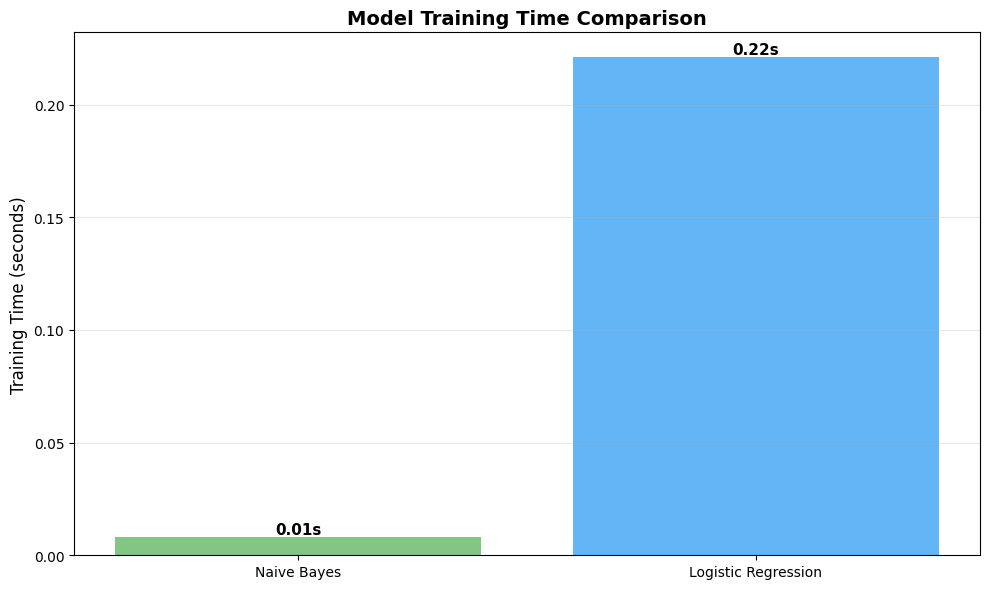


Naive Bayes is 26.7x faster than Logistic Regression


In [9]:
import matplotlib.pyplot as plt

# Compare training times
models = ['Naive Bayes', 'Logistic Regression']
times = [nb_train_time, lr_train_time]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, times, color=['#4CAF50', '#2196F3'], alpha=0.7)
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.title('Model Training Time Comparison', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, time_val in zip(bars, times):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{time_val:.2f}s',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nNaive Bayes is {lr_train_time/nb_train_time:.1f}x faster than Logistic Regression")

## 5. Sample Predictions

In [10]:
# Get predictions for a few test samples
n_samples = 5
sample_indices = np.random.choice(X_test.shape[0], n_samples, replace=False)

print("Sample Predictions:\n" + "="*80)

for i, idx in enumerate(sample_indices, 1):
    X_sample = X_test[idx:idx+1]
    y_true = y_test[idx]
    
    # Naive Bayes prediction
    nb_pred = predict_with_confidence(nb_model, X_sample)
    nb_label = 'Positive' if nb_pred['predictions'][0] == 1 else 'Negative'
    nb_conf = nb_pred['confidence'][0]
    
    # Logistic Regression prediction
    lr_pred = predict_with_confidence(lr_model, X_sample)
    lr_label = 'Positive' if lr_pred['predictions'][0] == 1 else 'Negative'
    lr_conf = lr_pred['confidence'][0]
    
    true_label = 'Positive' if y_true == 1 else 'Negative'
    
    print(f"\nSample {i}:")
    print(f"  True Label: {true_label}")
    print(f"  Naive Bayes: {nb_label} (confidence: {nb_conf:.3f})")
    print(f"  Logistic Regression: {lr_label} (confidence: {lr_conf:.3f})")
    print(f"  Agreement: {'✓' if nb_label == lr_label else '✗'}")

Sample Predictions:

Sample 1:
  True Label: Positive
  Naive Bayes: Positive (confidence: 0.902)
  Logistic Regression: Positive (confidence: 0.958)
  Agreement: ✓

Sample 2:
  True Label: Positive
  Naive Bayes: Positive (confidence: 0.690)
  Logistic Regression: Positive (confidence: 0.909)
  Agreement: ✓

Sample 3:
  True Label: Positive
  Naive Bayes: Positive (confidence: 0.849)
  Logistic Regression: Positive (confidence: 0.923)
  Agreement: ✓

Sample 4:
  True Label: Positive
  Naive Bayes: Positive (confidence: 0.882)
  Logistic Regression: Positive (confidence: 0.984)
  Agreement: ✓

Sample 5:
  True Label: Negative
  Naive Bayes: Negative (confidence: 0.876)
  Logistic Regression: Negative (confidence: 0.965)
  Agreement: ✓


## 6. Summary

### Models Trained:
1. ✅ **Naive Bayes (MultinomialNB)**
   - Alpha: 1.0 (Laplace smoothing)
   - Training time: ~seconds
   - Saved to: `models/naive_bayes_model.pkl`

2. ✅ **Logistic Regression**
   - C: 1.0 (regularization)
   - Max iterations: 1000
   - Solver: liblinear
   - Training time: ~seconds
   - Saved to: `models/logistic_regression_model.pkl`

### Initial Observations:
- Both models achieve high accuracy on test set
- Naive Bayes trains significantly faster
- Models show good agreement on predictions

### Next Steps:
- Comprehensive evaluation with all metrics
- Confusion matrix analysis
- Feature importance analysis
- Detailed model comparison